In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style("whitegrid")

In [3]:
ames = pd.read_csv("data/train.csv")

### Nominal Variables

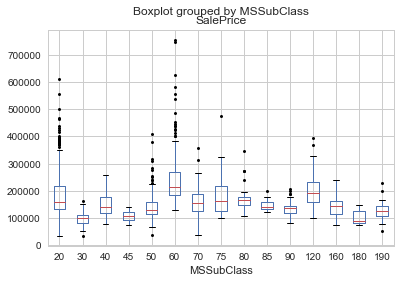

In [6]:
ames.boxplot(column='SalePrice', by='MSSubClass', sym='k.')

In [19]:
list1 = ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour']

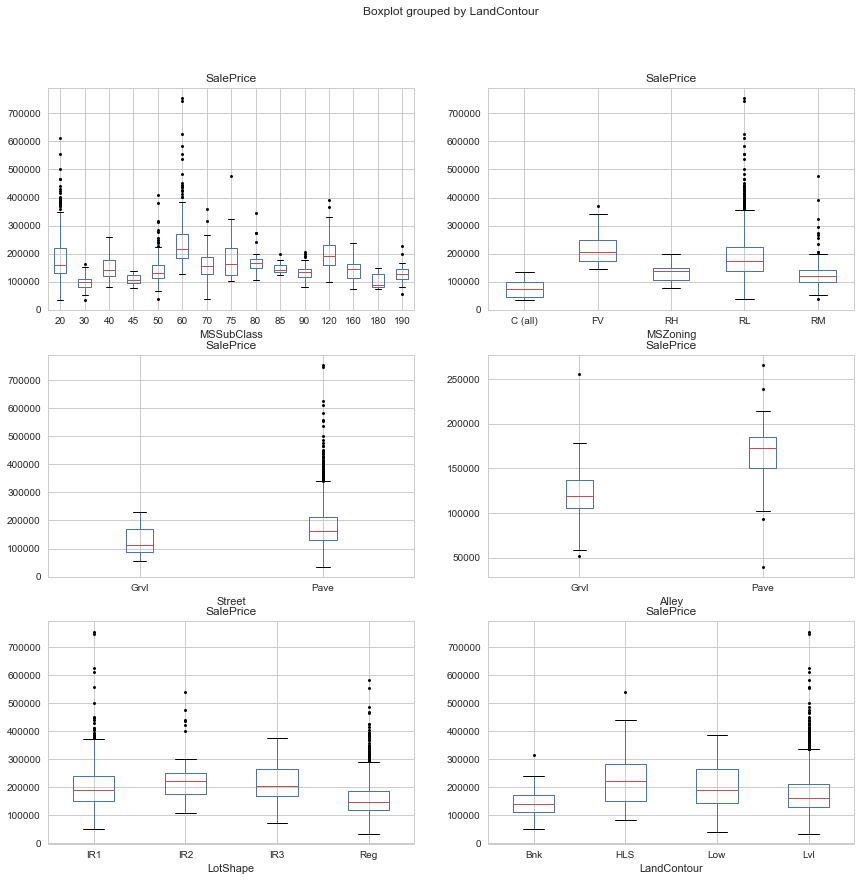

In [21]:
fig1, ax1 = plt.subplots(nrows=3, ncols=2, figsize=(14,14))
for i in range(0,6):
    ames.boxplot(column='SalePrice',by=list1[i],sym='k.', ax=ax1[i//2,i%2])

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


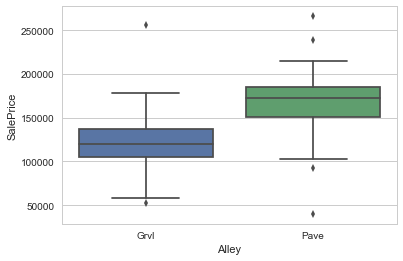

In [24]:
sns.boxplot(x='Alley', y='SalePrice', data=ames)

In [25]:
ames.groupby('Alley').mean()['SalePrice']

Alley
Grvl    122219.080000
Pave    168000.585366
Name: SalePrice, dtype: float64